Python/MATLAB for Physics

Adam Watts

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

---

<img src='HW_2_1.png' width=600px />

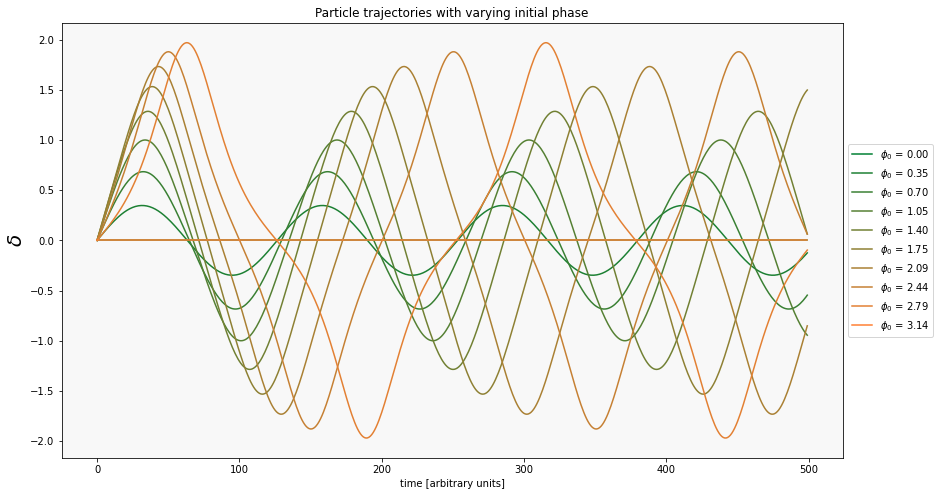

In [2]:
tnum = 500

p0_array = np.linspace(0, np.pi, 10)
plt.figure(figsize=(14,8))
plt.title('Particle trajectories with varying initial phase')
color_array = np.linspace(0,1,len(p0_array))

for n in range(len(p0_array)):
    d0 = 0.0
    p0 = p0_array[n]
    d = np.zeros(tnum)*np.nan
    p = np.zeros(tnum)*np.nan
    d[0] = d0
    p[0] = p0

    for i in range(1,tnum):
        d[i] = d[i-1] + 0.05*np.sin(p[i-1])
        p[i] = p[i-1] -0.05*d[i]
    plt.plot(d, color=(color_array[n], 0.5, 0.2), label=r'$\phi_0$ = %.2f'%(p0_array[n]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time [arbitrary units]')
plt.ylabel('$\delta$', fontsize=20)
plt.gca().set_facecolor('#F8F8F8')

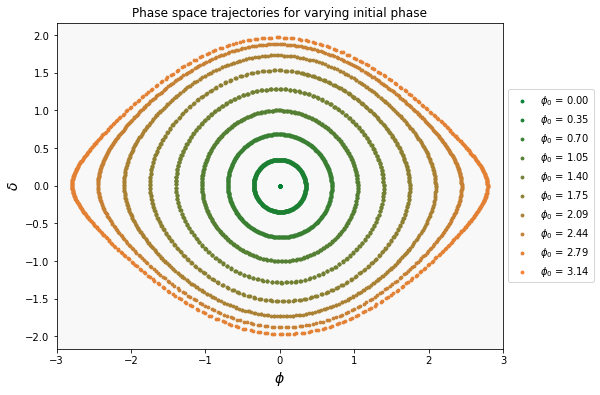

In [3]:
# Plot phase space for fun
plt.figure(figsize=(8,6))
plt.title('Phase space trajectories for varying initial phase')

for n in range(len(p0_array)):
    d0 = 0.0
    p0 = p0_array[n]
    d = np.zeros(tnum)*np.nan
    p = np.zeros(tnum)*np.nan
    d[0] = d0
    p[0] = p0

    for i in range(1,tnum):
        d[i] = d[i-1] + 0.05*np.sin(p[i-1])
        p[i] = p[i-1] -0.05*d[i]
    plt.scatter(p, d, s=8.0, color=(1.0*color_array[n], 0.5, 0.2), label=r'$\phi_0$ = %.2f'%(p0_array[n]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-3,3)
plt.xlabel('$\phi$', fontsize=14)
plt.ylabel('$\delta$', fontsize=14)
plt.gca().set_facecolor('#F8F8F8')

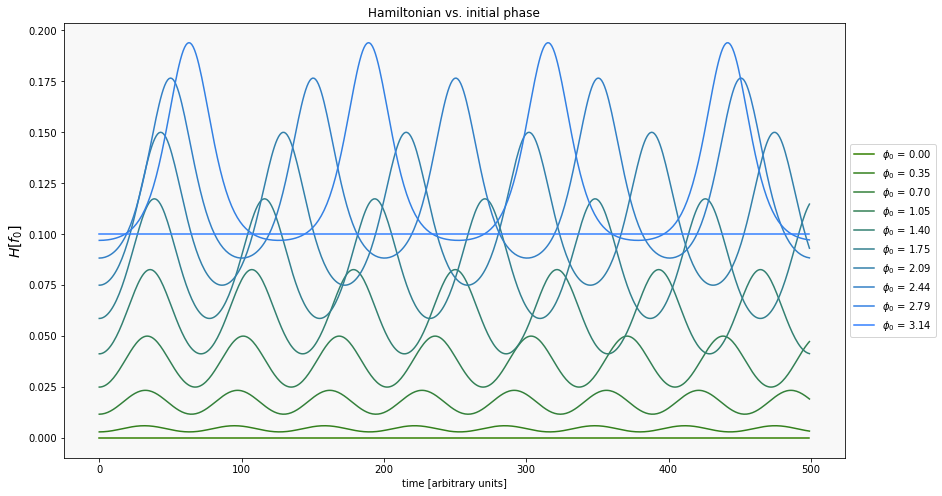

In [4]:
# Plot the Hamiltonian for a non-zero trajectory
plt.figure(figsize=(14,8))
plt.title('Hamiltonian vs. initial phase')

for n in range(len(p0_array)):
    d0 = 0.0
    p0 = p0_array[n]
    d = np.zeros(tnum)*np.nan
    p = np.zeros(tnum)*np.nan
    d[0] = d0
    p[0] = p0

    for i in range(1,tnum):
        d[i] = d[i-1] + 0.05*np.sin(p[i-1])
        p[i] = p[i-1] -0.05*d[i]
    #plt.scatter(p, d, s=8.0, color=(1.0*color_array[n], 0.5, 0.2), label=r'$\phi_0$ = %.2f'%(p0_array[n]))
    H = 0.5*(0.05)*d**2 + 0.05*(1-np.cos(p0))
    plt.plot(H, color=(0.2, 0.5, color_array[n]), label=r'$\phi_0$ = %.2f'%(p0_array[n]))
plt.ylabel('$H [f_0]$', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time [arbitrary units]')
plt.gca().set_facecolor('#F8F8F8')

---

<img src='HW_2_2.png' width=600px />

In [5]:
L, f1, f2 = symbols(['L','f_1','f_2'])

In [6]:
# Horizontal FODO cell matrix
M_QF_H = Matrix([[1,0],[-1/(2*f1),1]])
M_L_H = Matrix([[1,L],[0,1]])
M_QD_H = Matrix([[1,0],[1/(f2),1]])

M_FODO_H = simplify(M_QF_H*M_L_H*M_QD_H*M_L_H*M_QF_H); M_FODO_H

Matrix([
[                     -L**2/(2*f_1*f_2) + L/f_2 - L/f_1 + 1,                     L*(L + 2*f_2)/f_2],
[(L**2/4 - L*f_1 + L*f_2/2 + f_1**2 - f_1*f_2)/(f_1**2*f_2), -L**2/(2*f_1*f_2) + L/f_2 - L/f_1 + 1]])

In [7]:
# Vertical FODO cell matrix
M_QF_V = Matrix([[1,0],[1/(2*f1),1]])
M_L_V = Matrix([[1,L],[0,1]])
M_QD_V = Matrix([[1,0],[-1/(f2),1]])

M_FODO_V = simplify(M_QF_V*M_L_V*M_QD_V*M_L_V*M_QF_V); M_FODO_V

Matrix([
[                      -L**2/(2*f_1*f_2) - L/f_2 + L/f_1 + 1,                    L*(-L + 2*f_2)/f_2],
[(-L**2/4 - L*f_1 + L*f_2/2 - f_1**2 + f_1*f_2)/(f_1**2*f_2), -L**2/(2*f_1*f_2) - L/f_2 + L/f_1 + 1]])

In [8]:
# Horizontal stability condition
H_stable = (M_FODO_H[0,0] + M_FODO_H[1,1])/2 # half of the trace
H_stable

-L**2/(2*f_1*f_2) + L/f_2 - L/f_1 + 1

In [9]:
V_stable = (M_FODO_V[0,0] + M_FODO_V[1,1])/2 # half of the trace
V_stable

-L**2/(2*f_1*f_2) - L/f_2 + L/f_1 + 1

In [10]:
# substitute single variables for L/f1, L/f2
a, b = symbols(['a', 'b'])
H_stable = H_stable.subs({L/f1:a, L/f2:b})
H_stable

-a*b/2 - a + b + 1

In [11]:
V_stable = V_stable.subs({L/f1:a, L/f2:b})
V_stable

-a*b/2 + a - b + 1

In [12]:
# Convert to a function
Htrace = lambdify([a, b], H_stable)
Vtrace = lambdify([a, b], V_stable)

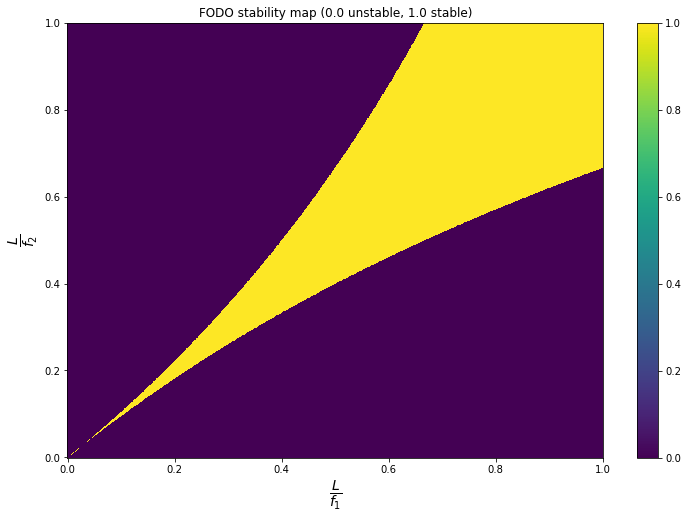

In [13]:
n = 1000
range = np.linspace(0,1.0,n)
X, Y = np.meshgrid(range, range)


plt.figure(figsize=(12,8))
plt.title('FODO stability map (0.0 unstable, 1.0 stable)')
plt.pcolormesh(X, Y, np.logical_and(Htrace(X,Y)<1, Vtrace(X,Y)<1), shading='auto')
plt.xlabel(r'$\frac{L}{f_1}$', fontsize=20)
plt.ylabel(r'$\frac{L}{f_2}$', fontsize=20)
plt.colorbar()

---

<img src='HW_2_3.png' width=600px />

In [14]:
x = Function('x')
B, w, f0, w0, t, C1, C2 = symbols(['beta', 'omega', 'f_0', 'omega_0', 't', 'C1', 'C2'], real=True)
eq = Eq(x(t).diff(t,t) - B*x(t).diff(t) + w**2*x(t),f0*sin(w0*t)); eq

Eq(-beta*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), f_0*sin(omega_0*t))

In [15]:
soln = dsolve(eq, x(t)).simplify().rhs; soln

(beta*f_0*omega_0*cos(omega_0*t) + f_0*omega**2*sin(omega_0*t) - f_0*omega_0**2*sin(omega_0*t) + (C1*exp(t*(beta - sqrt(beta**2 - 4*omega**2))/2) + C2*exp(t*(beta + sqrt(beta**2 - 4*omega**2))/2))*(beta**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4))/(beta**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)

In [16]:
soln = soln.subs({Symbol('C1'):0.0, Symbol('C2'):0.0}); soln

(beta*f_0*omega_0*cos(omega_0*t) + f_0*omega**2*sin(omega_0*t) - f_0*omega_0**2*sin(omega_0*t))/(beta**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)

In [17]:
soln = soln.subs(t, 0)*(w**2/f0); soln

beta*omega**2*omega_0/(beta**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)

In [18]:
soln1 = soln.subs(B, 0.1*w0); soln1

0.1*omega**2*omega_0**2/(omega**4 - 2*omega**2*omega_0**2 + 1.01*omega_0**4)

In [19]:
soln2 = soln.subs(B, 0.05*w0); soln2

0.05*omega**2*omega_0**2/(omega**4 - 2*omega**2*omega_0**2 + 1.0025*omega_0**4)

In [20]:
a = Symbol('alpha')
soln1 = soln1.subs(w0, a*w); simplify(soln1)


0.1*alpha**2/(1.01*alpha**4 - 2*alpha**2 + 1)

In [21]:
soln2 = soln2.subs(w0, a*w); simplify(soln2)

0.05*alpha**2/(1.0025*alpha**4 - 2*alpha**2 + 1)

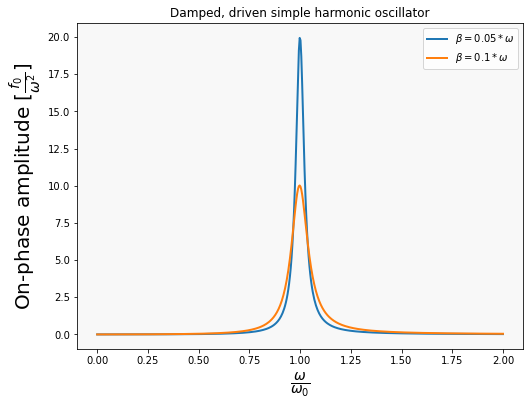

In [22]:
soln1_func = lambdify(a, soln1.subs(w0, a*w))
soln2_func = lambdify(a, soln2.subs(w0, a*w))

a_array = np.linspace(0.0,2.0,500)

plt.figure(figsize=(8,6))
plt.title('Damped, driven simple harmonic oscillator')
plt.plot(a_array, soln2_func(a_array), label=r'$\beta=0.05*\omega$', linewidth=2.0)
plt.plot(a_array, soln1_func(a_array), label=r'$\beta=0.1*\omega$', linewidth=2.0)
plt.xlabel(r'$\frac{\omega}{\omega_0}$', fontsize=20)
plt.ylabel(r'On-phase amplitude [$\frac{f_0}{\omega^2}$]', fontsize=20)
plt.gca().set_facecolor('#F8F8F8')
plt.legend()